In [1]:
import os
import pandas as pd
path = r"C:\Users\Wong\Desktop\Dissertation\Imputed_dataset"

Albermarle_rainfall = pd.read_csv(os.path.join(path, 'Albermarle_rainfall.csv'))
Stamfordham_water = pd.read_csv(os.path.join(path, 'Stamfordham.csv'))

In [2]:
Albermarle_rainfall['dateTime'] = pd.to_datetime(Albermarle_rainfall['dateTime'])
Stamfordham_water['dateTime'] = pd.to_datetime(Stamfordham_water['dateTime'])

In [3]:
Stamfordham_water.set_index('dateTime', inplace=True)
Albermarle_rainfall.set_index('dateTime', inplace=True)

In [4]:
start_date = pd.to_datetime('11/03/2020 00:00:00', format='%d/%m/%Y %H:%M:%S')
end_date = pd.to_datetime('05/09/2023 00:00:00', format='%d/%m/%Y %H:%M:%S')
Stamfordham_water_subset = Stamfordham_water.loc[(Stamfordham_water.index >= start_date) & (Stamfordham_water.index <= end_date)]
Albermarle_rainfall_subset = Albermarle_rainfall.loc[(Albermarle_rainfall.index >= start_date) & (Albermarle_rainfall.index <= end_date)]

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
merged_data = pd.merge(Albermarle_rainfall_subset, Stamfordham_water_subset, on='dateTime', how='inner')

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged_data = scaler.fit_transform(merged_data)

In [8]:
train_data = merged_data[:97767]
test_data = merged_data[97767:]

In [9]:
window_size = 96
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

In [11]:
Ridge_Stamfordham_96in_48out = Ridge()
cv_scores_Stamfordham_96in_48out_Ridge = cross_val_score(Ridge_Stamfordham_96in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [12]:
cv_scores_Stamfordham_96in_48out_Ridge = -cv_scores_Stamfordham_96in_48out_Ridge
print("Cross-validation scores:")
print(cv_scores_Stamfordham_96in_48out_Ridge)
print("Mean MSE:", cv_scores_Stamfordham_96in_48out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Stamfordham_96in_48out_Ridge.std())

Cross-validation scores:
[0.00390386 0.00037749 0.00120793 0.00033132 0.00061242]
Mean MSE: 0.001286603712772211
Standard Deviation MSE: 0.001345348245833527


In [13]:
window_size = 48
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [14]:
Ridge_Standfordham_48in_48out = Ridge()
cv_scores_Standfordham_48in_48out_Ridge = cross_val_score(Ridge_Standfordham_48in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Standfordham_48in_48out_Ridge = -cv_scores_Standfordham_48in_48out_Ridge
print("Cross-validation scores:")
print(cv_scores_Standfordham_48in_48out_Ridge)
print("Mean MSE:", cv_scores_Standfordham_48in_48out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Standfordham_48in_48out_Ridge.std())

Cross-validation scores:
[0.00351943 0.00038664 0.00126033 0.00035164 0.00063295]
Mean MSE: 0.0012301990530726931
Standard Deviation MSE: 0.0011900987191964117


In [15]:
window_size = 24
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [16]:
Ridge_Standfordham_24in_48out = Ridge()
cv_scores_Standfordham_24in_48out_Ridge = cross_val_score(Ridge_Standfordham_24in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Standfordham_24in_48out_Ridge = -cv_scores_Standfordham_24in_48out_Ridge
print("Cross-validation scores:")
print(cv_scores_Standfordham_24in_48out_Ridge)
print("Mean MSE:", cv_scores_Standfordham_24in_48out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Standfordham_24in_48out_Ridge.std())

Cross-validation scores:
[0.00360256 0.00039649 0.00127422 0.00034913 0.0006607 ]
Mean MSE: 0.0012566206503943304
Standard Deviation MSE: 0.0012183768022889828


In [17]:
window_size = 96
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [18]:
Ridge_Standfordham_96in_32out = Ridge()
cv_scores_Standfordham_96in_32out_Ridge = cross_val_score(Ridge_Standfordham_96in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Standfordham_96in_32out_Ridge = -cv_scores_Standfordham_96in_32out_Ridge
print("Cross-validation scores:")
print(cv_scores_Standfordham_96in_32out_Ridge)
print("Mean MSE:", cv_scores_Standfordham_96in_32out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Standfordham_96in_32out_Ridge.std())

Cross-validation scores:
[0.00169805 0.00019491 0.00053327 0.00015826 0.00026648]
Mean MSE: 0.0005701934061242404
Standard Deviation MSE: 0.0005789977602549244


In [19]:
window_size = 48
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [20]:
Ridge_Standfordham_48in_32out = Ridge()
cv_scores_Standfordham_48in_32out_Ridge = cross_val_score(Ridge_Standfordham_48in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Standfordham_48in_32out_Ridge = -cv_scores_Standfordham_48in_32out_Ridge
print("Cross-validation scores:")
print(cv_scores_Standfordham_48in_32out_Ridge)
print("Mean MSE:", cv_scores_Standfordham_48in_32out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Standfordham_48in_32out_Ridge.std())

Cross-validation scores:
[0.00155007 0.00020043 0.00055575 0.0001661  0.00027358]
Mean MSE: 0.0005491857723475753
Standard Deviation MSE: 0.0005188750507476859


In [21]:
window_size = 24
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [22]:
Ridge_Standfordham_24in_32out = Ridge()
cv_scores_Standfordham_24in_32out_Ridge = cross_val_score(Ridge_Standfordham_24in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Standfordham_24in_32out_Ridge = -cv_scores_Standfordham_24in_32out_Ridge
print("Cross-validation scores:")
print(cv_scores_Standfordham_24in_32out_Ridge)
print("Mean MSE:", cv_scores_Standfordham_24in_32out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Standfordham_24in_32out_Ridge.std())

Cross-validation scores:
[0.00161484 0.00020483 0.00055299 0.00016347 0.00028285]
Mean MSE: 0.0005637957674433543
Standard Deviation MSE: 0.0005427441753705636


In [23]:
window_size = 96
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [24]:
Ridge_Standfordham_96in_16out = Ridge()
cv_scores_Standfordham_96in_16out_Ridge = cross_val_score(Ridge_Standfordham_96in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Standfordham_96in_16out_Ridge = -cv_scores_Standfordham_96in_16out_Ridge
print("Cross-validation scores:")
print(cv_scores_Standfordham_96in_16out_Ridge)
print("Mean MSE:", cv_scores_Standfordham_96in_16out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Standfordham_96in_16out_Ridge.std())

Cross-validation scores:
[4.53612061e-04 5.96585315e-05 1.45526635e-04 3.81919860e-05
 5.98654159e-05]
Mean MSE: 0.0001513709259432206
Standard Deviation MSE: 0.00015554919063452298


In [25]:
window_size = 48
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [26]:
Ridge_Standfordham_48in_16out = Ridge()
cv_scores_Standfordham_48in_16out_Ridge = cross_val_score(Ridge_Standfordham_48in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Standfordham_48in_16out_Ridge = -cv_scores_Standfordham_48in_16out_Ridge
print("Cross-validation scores:")
print(cv_scores_Standfordham_48in_16out_Ridge)
print("Mean MSE:", cv_scores_Standfordham_48in_16out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Standfordham_48in_16out_Ridge.std())

Cross-validation scores:
[4.18299284e-04 6.14184415e-05 1.50094185e-04 3.90205042e-05
 6.07686703e-05]
Mean MSE: 0.0001459202170037664
Standard Deviation MSE: 0.00014144020818775087


In [27]:
window_size = 24
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [28]:
Ridge_Standfordham_24in_16out = Ridge()
cv_scores_Standfordham_24in_16out_Ridge = cross_val_score(Ridge_Standfordham_24in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Standfordham_24in_16out_Ridge = -cv_scores_Standfordham_24in_16out_Ridge
print("Cross-validation scores:")
print(cv_scores_Standfordham_24in_16out_Ridge)
print("Mean MSE:", cv_scores_Standfordham_24in_16out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Standfordham_24in_16out_Ridge.std())

Cross-validation scores:
[4.41610432e-04 6.22826340e-05 1.45349486e-04 3.88027149e-05
 6.21772975e-05]
Mean MSE: 0.00015004451278465334
Standard Deviation MSE: 0.00015022001258578255


In [29]:
window_size = 96
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [30]:
Ridge_Standfordham_96in_8out = Ridge()
cv_scores_Standfordham_96in_8out_Ridge = cross_val_score(Ridge_Standfordham_96in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Standfordham_96in_8out_Ridge = -cv_scores_Standfordham_96in_8out_Ridge
print("Cross-validation scores:")
print(cv_scores_Standfordham_96in_8out_Ridge)
print("Mean MSE:", cv_scores_Standfordham_96in_8out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Standfordham_96in_8out_Ridge.std())

Cross-validation scores:
[1.50617878e-04 2.14219446e-05 4.58867223e-05 1.09977954e-05
 1.60430506e-05]
Mean MSE: 4.89934781572423e-05
Standard Deviation MSE: 5.220490896588533e-05


In [31]:
window_size = 48
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [32]:
Ridge_Standfordham_48in_8out = Ridge()
cv_scores_Standfordham_48in_8out_Ridge = cross_val_score(Ridge_Standfordham_48in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Standfordham_48in_8out_Ridge = -cv_scores_Standfordham_48in_8out_Ridge
print("Cross-validation scores:")
print(cv_scores_Standfordham_48in_8out_Ridge)
print("Mean MSE:", cv_scores_Standfordham_48in_8out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Standfordham_48in_8out_Ridge.std())

Cross-validation scores:
[1.39167913e-04 2.19122819e-05 4.67162107e-05 1.10093137e-05
 1.60832485e-05]
Mean MSE: 4.6977793495371766e-05
Standard Deviation MSE: 4.769815679591504e-05


In [33]:
window_size = 24
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [34]:
Ridge_Standfordham_24in_8out = Ridge()
cv_scores_Standfordham_24in_8out_Ridge = cross_val_score(Ridge_Standfordham_24in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_scores_Standfordham_24in_8out_Ridge = -cv_scores_Standfordham_24in_8out_Ridge
print("Cross-validation scores:")
print(cv_scores_Standfordham_24in_8out_Ridge)
print("Mean MSE:", cv_scores_Standfordham_24in_8out_Ridge.mean())
print("Standard Deviation MSE:", cv_scores_Standfordham_24in_8out_Ridge.std())

Cross-validation scores:
[1.49513048e-04 2.20745691e-05 4.53292345e-05 1.09444448e-05
 1.62715564e-05]
Mean MSE: 4.882657056991138e-05
Standard Deviation MSE: 5.169245998143023e-05


In [ ]:
cv_scores_Standfordham_24in_48out_Ridge

In [35]:
window_size = 24
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [36]:
Ridge_Standfordham_24in_48out = Ridge()
Ridge_Standfordham_24in_48out.fit(X_train, y_train)

Ridge()

In [37]:
pred_Ridge_Standfordham_24in_48out = Ridge_Standfordham_24in_48out.predict(X_test)

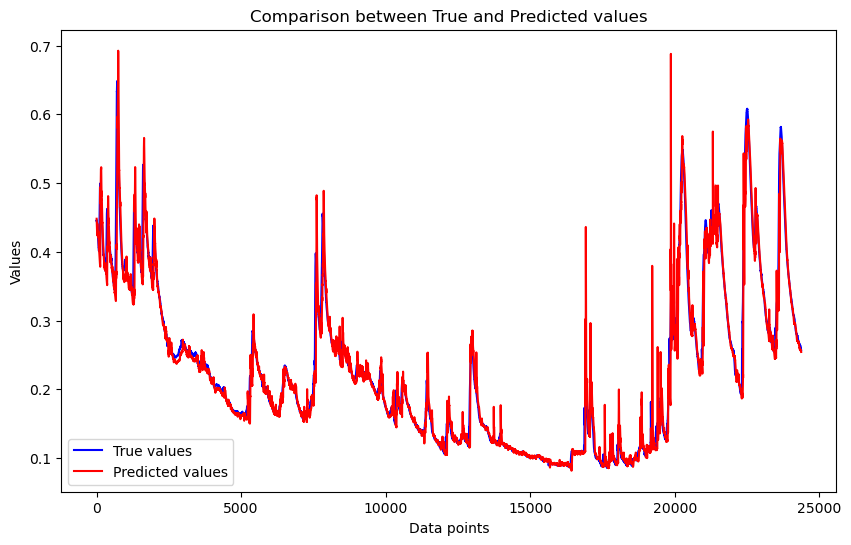

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_Ridge_Standfordham_24in_48out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [39]:
def nse(y_test, pred_Ridge_Standfordham_24in_48out):
    numerator = np.sum((y_test - pred_Ridge_Standfordham_24in_48out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_Ridge_Standfordham_24in_48out)
mae = mean_absolute_error(y_test, pred_Ridge_Standfordham_24in_48out)
nse_value = nse(y_test, pred_Ridge_Standfordham_24in_48out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.000550871825847406
MAE: 0.011263420102223665
NSE: 0.9600028780152743


In [40]:
ridge_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
grid_Ridge_Standfordham_24in_48out_1 = Ridge()

In [41]:
from sklearn.model_selection import GridSearchCV
grid_Ridge_Standfordham_24in_48out = GridSearchCV(grid_Ridge_Standfordham_24in_48out_1, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_Ridge_Standfordham_24in_48out.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [42]:
best_ridge_params = grid_Ridge_Standfordham_24in_48out.best_params_
print("Best Ridge Parameters:", best_ridge_params)

Best Ridge Parameters: {'alpha': 0.01}


In [43]:
tuned_Ridge_Standfordham_24in_48out = Ridge(alpha=0.01)

In [44]:
tuned_Ridge_Standfordham_24in_48out.fit(X_train, y_train)

Ridge(alpha=0.01)

In [45]:
pred_tuned_ridge_Standfordham_24in_48out = tuned_Ridge_Standfordham_24in_48out.predict(X_test)

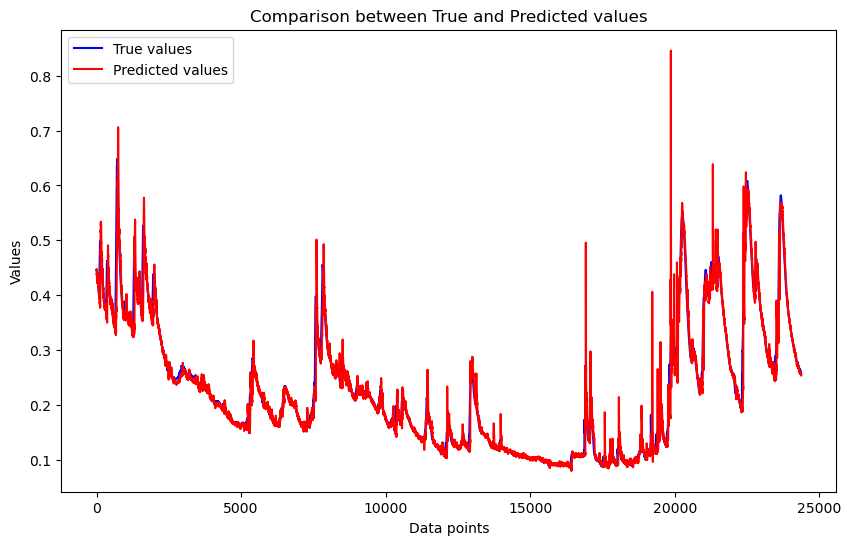

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_tuned_ridge_Standfordham_24in_48out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [47]:
def nse(y_test, pred_tuned_ridge_Standfordham_24in_48out):
    numerator = np.sum((y_test - pred_tuned_ridge_Standfordham_24in_48out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_tuned_ridge_Standfordham_24in_48out)
mae = mean_absolute_error(y_test, pred_tuned_ridge_Standfordham_24in_48out)
nse_value = nse(y_test, pred_tuned_ridge_Standfordham_24in_48out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0005469588546729583
MAE: 0.011050131439785336
NSE: 0.9602869869096552


In [ ]:
cv_scores_Standfordham_48in_32out_Ridge

In [48]:
window_size = 48
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [49]:
Ridge_Standfordham_48in_32out = Ridge()
Ridge_Standfordham_48in_32out.fit(X_train, y_train)

Ridge()

In [50]:
pred_Ridge_Standfordham_48in_32out = Ridge_Standfordham_48in_32out.predict(X_test)

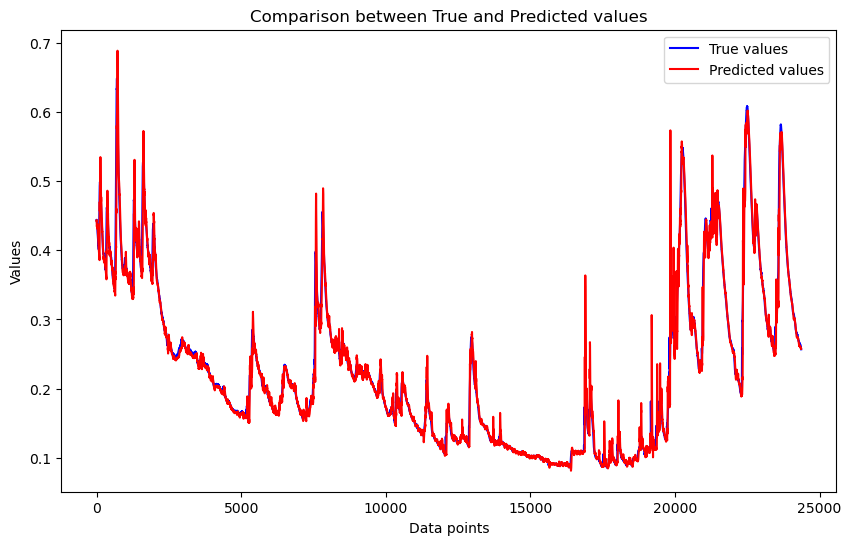

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_Ridge_Standfordham_48in_32out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [52]:
def nse(y_test, pred_Ridge_Standfordham_48in_32out):
    numerator = np.sum((y_test - pred_Ridge_Standfordham_48in_32out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_Ridge_Standfordham_48in_32out)
mae = mean_absolute_error(y_test, pred_Ridge_Standfordham_48in_32out)
nse_value = nse(y_test, pred_Ridge_Standfordham_48in_32out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.00026659143511715357
MAE: 0.00745732269228535
NSE: 0.9806282113483354


In [53]:
grid_Ridge_Standfordham_48in_32out_1 = Ridge()
grid_Ridge_Standfordham_48in_32out = GridSearchCV(grid_Ridge_Standfordham_48in_32out_1, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_Ridge_Standfordham_48in_32out.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [54]:
best_ridge_params = grid_Ridge_Standfordham_48in_32out.best_params_
print("Best Ridge Parameters:", best_ridge_params)

Best Ridge Parameters: {'alpha': 0.01}


In [55]:
tuned_Ridge_Standfordham_48in_32out = Ridge(alpha=0.01)

In [56]:
tuned_Ridge_Standfordham_48in_32out.fit(X_train, y_train)

Ridge(alpha=0.01)

In [57]:
pred_tuned_Ridge_Standfordham_48in_32out = tuned_Ridge_Standfordham_48in_32out.predict(X_test)

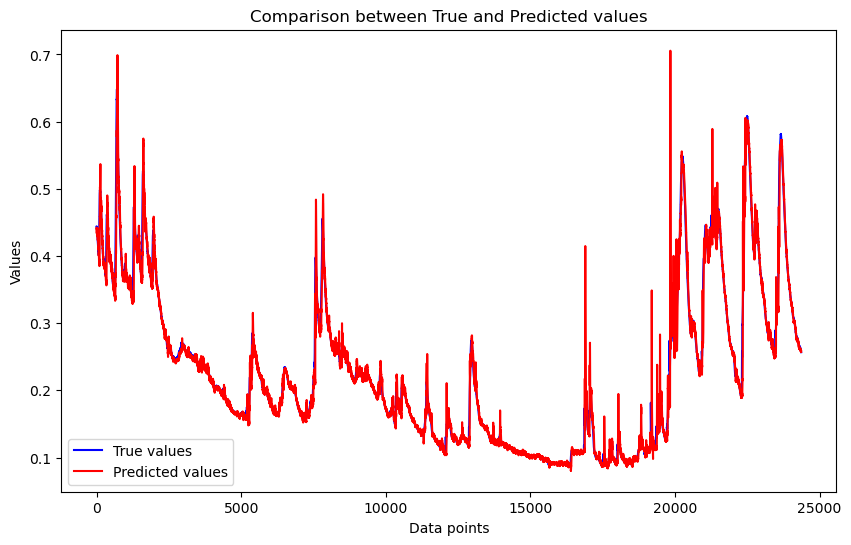

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_tuned_Ridge_Standfordham_48in_32out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [59]:
def nse(y_test, pred_tuned_Ridge_Standfordham_48in_32out):
    numerator = np.sum((y_test - pred_tuned_Ridge_Standfordham_48in_32out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_tuned_Ridge_Standfordham_48in_32out)
mae = mean_absolute_error(y_test, pred_tuned_Ridge_Standfordham_48in_32out)
nse_value = nse(y_test, pred_tuned_Ridge_Standfordham_48in_32out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0002555056724135945
MAE: 0.00715888672809337
NSE: 0.9814337550524739


In [ ]:
cv_scores_Standfordham_48in_16out_Ridge

In [60]:
window_size = 48
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [61]:
Ridge_Standfordham_48in_16out = Ridge()
Ridge_Standfordham_48in_16out.fit(X_train, y_train)

Ridge()

In [62]:
pred_Ridge_Standfordham_48in_16out = Ridge_Standfordham_48in_16out.predict(X_test)

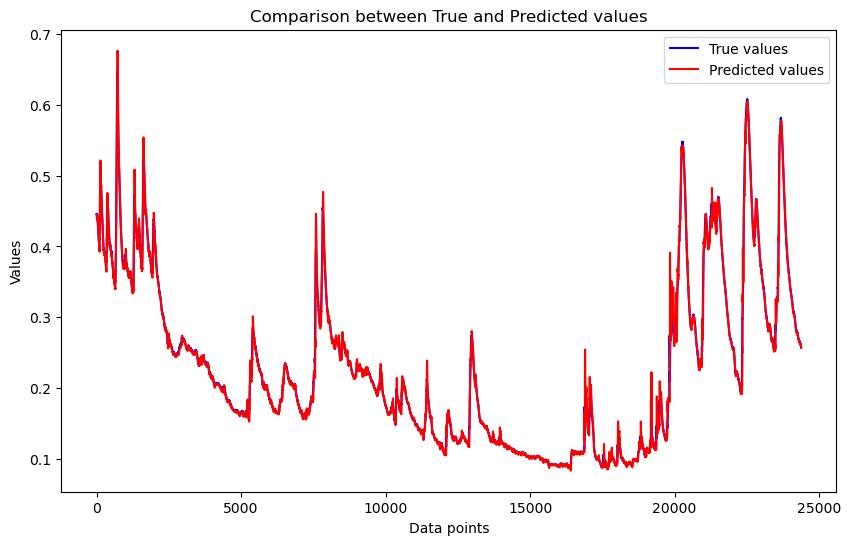

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_Ridge_Standfordham_48in_16out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [64]:
def nse(y_test, pred_Ridge_Standfordham_48in_16out):
    numerator = np.sum((y_test - pred_Ridge_Standfordham_48in_16out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_Ridge_Standfordham_48in_16out)
mae = mean_absolute_error(y_test, pred_Ridge_Standfordham_48in_16out)
nse_value = nse(y_test, pred_Ridge_Standfordham_48in_16out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 7.424579553512445e-05
MAE: 0.0035993272140048237
NSE: 0.994613496682989


In [65]:
grid_Ridge_Standfordham_48in_16out_1 = Ridge()
grid_Ridge_Standfordham_48in_16out = GridSearchCV(grid_Ridge_Standfordham_48in_16out_1, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_Ridge_Standfordham_48in_16out.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [66]:
best_ridge_params = grid_Ridge_Standfordham_48in_16out.best_params_
print("Best Ridge Parameters:", best_ridge_params)

Best Ridge Parameters: {'alpha': 0.01}


In [67]:
tuned_Ridge_Standfordham_48in_16out = Ridge(alpha=0.01)
tuned_Ridge_Standfordham_48in_16out.fit(X_train, y_train)

Ridge(alpha=0.01)

In [68]:
pred_tuned_ridge_Standfordham_48in_16out = tuned_Ridge_Standfordham_48in_16out.predict(X_test)

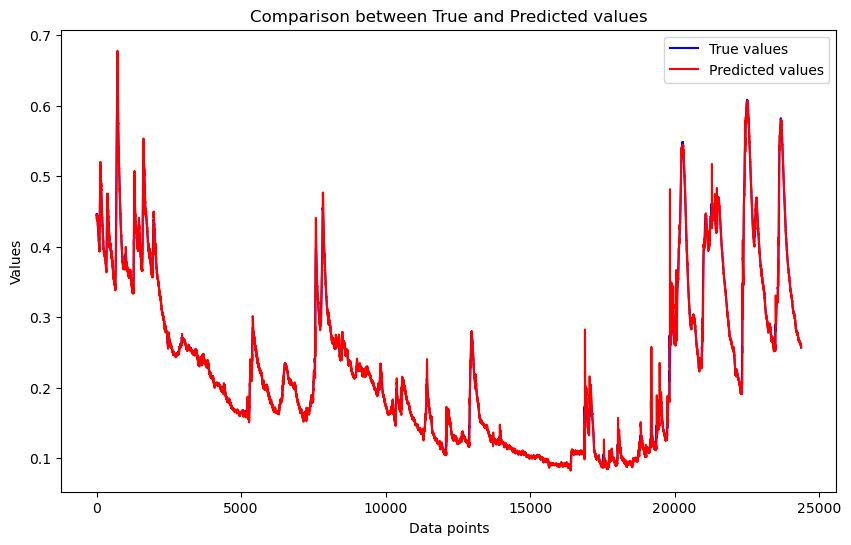

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_tuned_ridge_Standfordham_48in_16out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [70]:
def nse(y_test, pred_tuned_ridge_Standfordham_48in_16out):
    numerator = np.sum((y_test - pred_tuned_ridge_Standfordham_48in_16out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_tuned_ridge_Standfordham_48in_16out)
mae = mean_absolute_error(y_test, pred_tuned_ridge_Standfordham_48in_16out)
nse_value = nse(y_test, pred_tuned_ridge_Standfordham_48in_16out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 6.520015798362293e-05
MAE: 0.003301098370458745
NSE: 0.9952697541360133


In [ ]:
cv_scores_Standfordham_48in_8out_Ridge

In [71]:
window_size = 48
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [72]:
Ridge_Standfordham_48in_8out = Ridge()
Ridge_Standfordham_48in_8out.fit(X_train, y_train)

Ridge()

In [73]:
pred_Ridge_Standfordham_48in_8out = Ridge_Standfordham_48in_8out.predict(X_test)

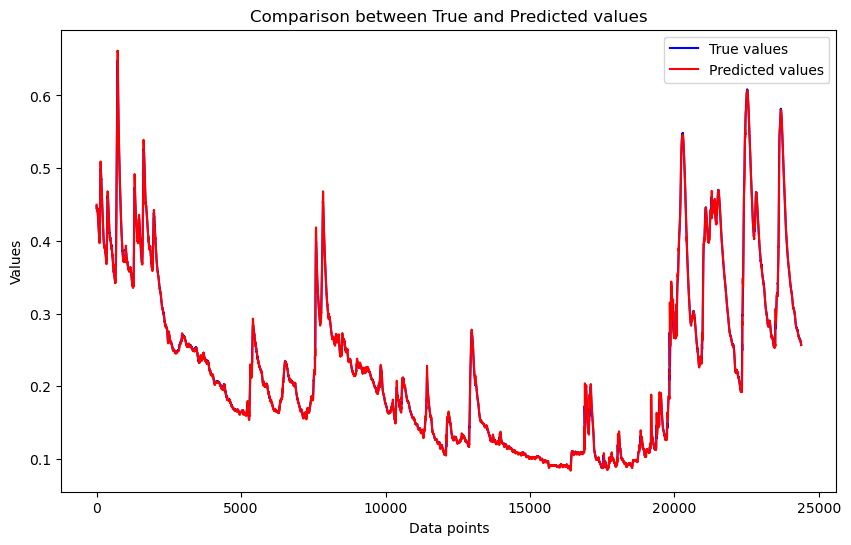

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_Ridge_Standfordham_48in_8out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [75]:
def nse(y_test, pred_Ridge_Standfordham_48in_8out):
    numerator = np.sum((y_test - pred_Ridge_Standfordham_48in_8out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_Ridge_Standfordham_48in_8out)
mae = mean_absolute_error(y_test, pred_Ridge_Standfordham_48in_8out)
nse_value = nse(y_test, pred_Ridge_Standfordham_48in_8out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 2.2337574344764036e-05
MAE: 0.0018463793992037143
NSE: 0.9983807210072401


In [76]:
grid_Ridge_Standfordham_48in_8out_1 = Ridge()
grid_Ridge_Standfordham_48in_8out = GridSearchCV(grid_Ridge_Standfordham_48in_8out_1, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_Ridge_Standfordham_48in_8out.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [77]:
best_ridge_params = grid_Ridge_Standfordham_48in_8out.best_params_
print("Best Ridge Parameters:", best_ridge_params)

Best Ridge Parameters: {'alpha': 0.001}


In [78]:
tuned_Ridge_Standfordham_48in_8out = Ridge(alpha=0.001)
tuned_Ridge_Standfordham_48in_8out.fit(X_train, y_train)

Ridge(alpha=0.001)

In [79]:
pred_tuned_ridge_Standfordham_48in_8out = tuned_Ridge_Standfordham_48in_8out.predict(X_test)

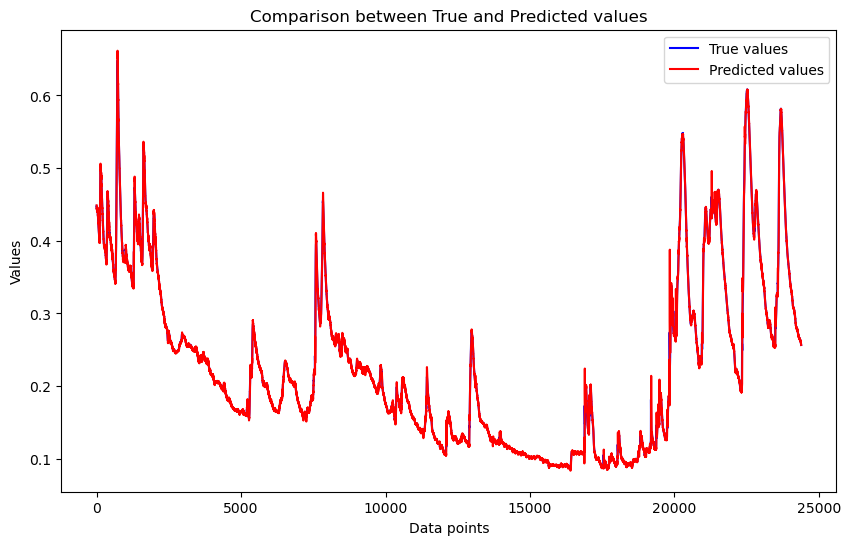

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_tuned_ridge_Standfordham_48in_8out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [81]:
def nse(y_test, pred_tuned_ridge_Standfordham_48in_8out):
    numerator = np.sum((y_test - pred_tuned_ridge_Standfordham_48in_8out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_tuned_ridge_Standfordham_48in_8out)
mae = mean_absolute_error(y_test, pred_tuned_ridge_Standfordham_48in_8out)
nse_value = nse(y_test, pred_tuned_ridge_Standfordham_48in_8out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 1.7845907910008838e-05
MAE: 0.0016292884575412716
NSE: 0.998706327583318


In [82]:
from joblib import dump
dump(Ridge_Standfordham_48in_8out, 'Ridge_Standfordham_48in_8out.joblib')

['Ridge_Standfordham_48in_8out.joblib']

In [83]:
dump(grid_Ridge_Standfordham_48in_8out, 'grid_Ridge_Standfordham_48in_8out.joblib')

['grid_Ridge_Standfordham_48in_8out.joblib']

In [84]:
dump(grid_Ridge_Standfordham_24in_48out, 'grid_Ridge_Standfordham_24in_48out.joblib')

['grid_Ridge_Standfordham_24in_48out.joblib']

In [85]:
dump(Ridge_Standfordham_24in_48out, 'Ridge_Standfordham_24in_48out.joblib')

['Ridge_Standfordham_24in_48out.joblib']

In [86]:
dump(grid_Ridge_Standfordham_48in_32out, 'grid_Ridge_Standfordham_48in_32out.joblib')

['grid_Ridge_Standfordham_48in_32out.joblib']

In [87]:
dump(Ridge_Standfordham_48in_32out, 'Ridge_Standfordham_48in_32out.joblib')

['Ridge_Standfordham_48in_32out.joblib']

In [88]:
dump(grid_Ridge_Standfordham_48in_16out, 'grid_Ridge_Standfordham_48in_16out.joblib')

['grid_Ridge_Standfordham_48in_16out.joblib']

In [89]:
dump(Ridge_Standfordham_48in_16out, 'Ridge_Standfordham_48in_16out.joblib')

['Ridge_Standfordham_48in_16out.joblib']